In [1]:
# import statements
from pathlib import Path
import os, re

In [2]:
# execute everything from root folder
os.chdir('..')

In [3]:
# define path variables
ROOT = Path(os.path.abspath('.'))
DATA = ROOT / 'examples'
TEST = ROOT / 'tests/data'

In [4]:
# use actual gazette file
actual_gazette = os.path.join(DATA, '38004a4b724a24c1e3c746596acf04efb0c95a58.pdf')

# use test files to show extraction from image
fake_png = TEST / 'fake_gazette.png'

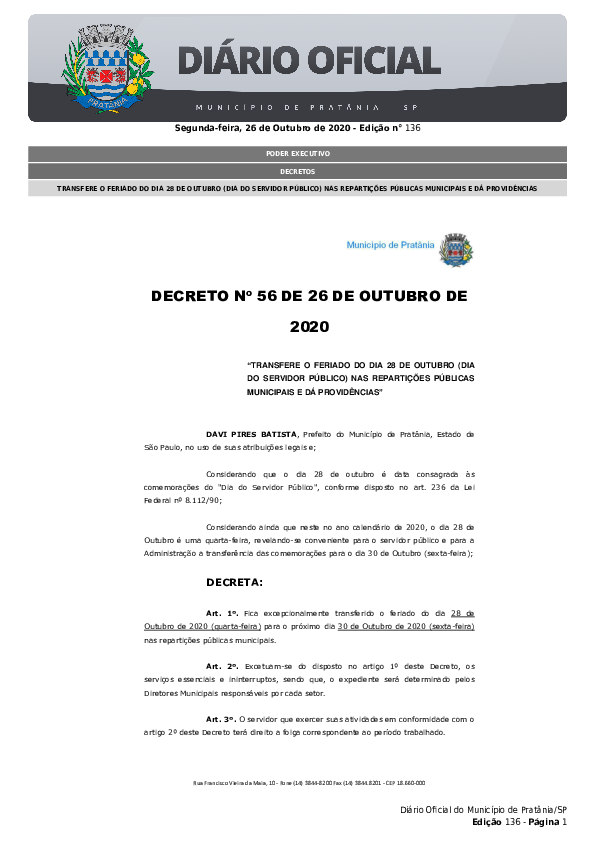

In [6]:
# visualize gazette
from wand.image import Image as Image
img = Image(filename=actual_gazette+'[1]')
img

In [9]:
# load toolbox classes and methods
from queridodiario_toolbox import Gazette

# process a single, easy to work with gazette
gazette = Gazette(
    filepath=actual_gazette,
    apache_tika_jar=f'{ROOT}/tests/bin/tika-app-1.24.1.jar',
    content=None
)

In [ ]:
# extract content
gazette.extract_content()
gazette.filepath

In [ ]:
# load content into memory
gazette.load_content()
gazette.content

In [ ]:
# extract metadata
gazette.filepath = actual_gazette
gazette.extract_content(metadata=True)
gazette.load_content()
gazette.content

In [ ]:
# process text
gazette.filepath = actual_gazette
gazette.extract_content()
gazette.load_content()
text = gazette.process_text()
text

In [ ]:
# process text but store text in content variable
gazette.filepath = actual_gazette
gazette.extract_content()
gazette.load_content()
gazette.process_text(store_text=True)
gazette.content

In [ ]:
# check if in fact these are the same object
text == gazette.content

In [ ]:
# slice text
text[:(1611+666)]

In [ ]:
# extract text from image
gazette.filepath = str(fake_png)
gazette.extract_content()
gazette.load_content()
text = gazette.process_text()
text

In [ ]:
# display image
Image(filename=fake_png)